In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( 'ignore' )


In [2]:
df = pd.read_csv('C:\\Users\\amrit\\Downloads\\EDA\\Week 1-20210809T114121Z-001\\Week 1\\5. Lab\\EDA - Takehome (Week-1(Part-1))\\flower_types.csv')

df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe( include ='all')

# 5 point summary of entire dataset.

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
df.info()

# there are 150 rows and 5 columns of data in the given iris dataset.

# There are 4 numerical and 1 categorical column of object type.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Q1. create 2 dummy variables for unique categories of flower species

df['class'].unique()

# class has 3 different species of flower namely setosa, versicolor and virginica.


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
pd.get_dummies( df['class'] , drop_first = True).head()

# we created 2 dummy variables dropping the first one setosa particularly.

# the zero value in first 5 rows of versicolor and virginica denotes that the flower is of setosa type.


,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [7]:
#Q2. count the flowers whose sepal width is not known.

df['sepal width'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [8]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [9]:
# there are no zero values in dataset. 

# Hence, no flower data in the dataset has sepal width unknown.

In [10]:
#Q3. Is the variable 'sepal length' skewed ? If yes, suggest appropriate transformation to reduce skewness ?

df['sepal length'].skew()

# no skewness

0.3149109566369728

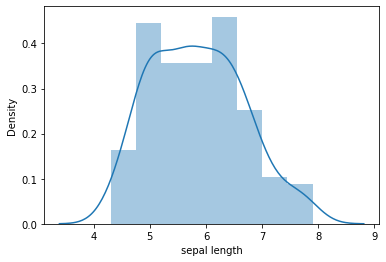

In [11]:
sns.distplot( df['sepal length'] )
plt.show()

# graph also is not skewed.

# The sepal length column is not skewed and transformation is not required.

In [12]:
#Q4. Is it appropriate to perform frequency encoding on flower species ? Give a suitable reason for your response.
    
encoding = df.groupby('class').size()

encoding = encoding/len(df)
    
df['class_freq'] = df['class'].map(encoding)
df.head()


,sepal length,sepal width,petal length,petal width,class,class_freq
0,5.1,3.5,1.4,0.2,setosa,0.333333
1,4.9,3.0,1.4,0.2,setosa,0.333333
2,4.7,3.2,1.3,0.2,setosa,0.333333
3,4.6,3.1,1.5,0.2,setosa,0.333333
4,5.0,3.6,1.4,0.2,setosa,0.333333


In [13]:
df['class_freq'].unique()

array([0.33333333])

In [14]:
# Thus, it is not suitable to perform frequency encoding on class column since all 3 class categories are getting same frequency as 0.33


In [15]:
#Q5. Does petal width range from 0 to 1? If not, transform values such that they lie between 0 and 1.

print(df['petal width'].unique())

print(df['petal width'].max())

print(df['petal width'].min())

# min value of petal width is 0.1 and max value is 2.5

# Thus, range of values in petal width column is not from 0.1 to 2.5 so scaling is required.


[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
2.5
0.1


In [16]:
# min-max scaling

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
transformed_width = mm.fit_transform(df[['petal width' ]])

print('Max now: ' , transformed_width.max() )
print('Min now: ' , transformed_width.min() )

# After scaling transformation, the value of petal width column is in 0 to 1 range inclusive.


Max now:  1.0
Min now:  0.0


In [17]:
# Q6. Construct  a boolean matrix such that it returns true for coorelation greater than 0.8

df.corr() > 0.8

# Diagonal entries in correlation matrix will always be true since it is correlation with itself of the variable.

# From the table, the variables (sepal length - petal length) , (sepal length - petal width) , (petal length -petal width) have a high positive correlation.

# The value False in the matrix indicates correlation of <=0.8


,sepal length,sepal width,petal length,petal width,class_freq
sepal length,True,False,True,True,False
sepal width,False,True,False,False,False
petal length,True,False,True,True,False
petal width,True,False,True,True,False
class_freq,False,False,False,False,True


In [18]:
#Q7. find probability that sepal length of a flower is less than 6 cm using a plot.

# Distplot is used to indicate probability effectively.


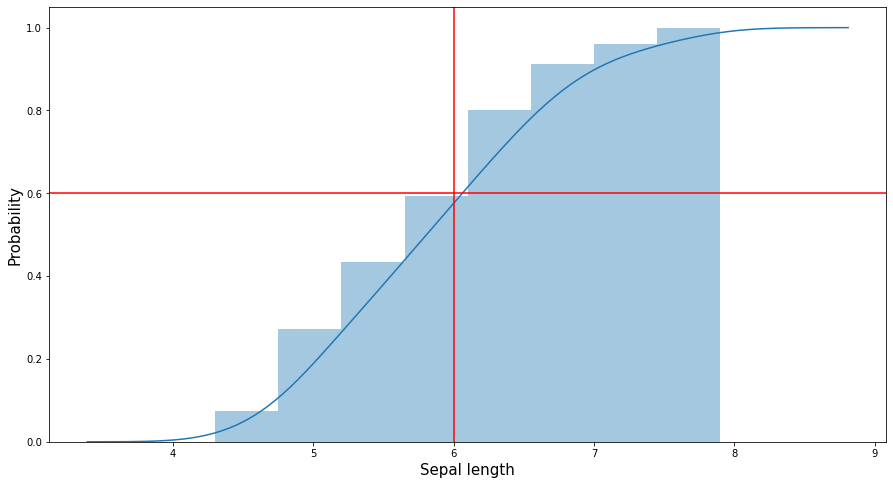

In [19]:
plt.figure(figsize =(15,8))
sns.distplot(df['sepal length'] , hist_kws = dict(cumulative = True) , kde_kws = dict(cumulative = True) )

plt.axvline(6 , color='red')
plt.axhline(0.6 , color='red')

plt.xlabel('Sepal length' , fontsize = 15)
plt.ylabel('Probability' , fontsize = 15)

plt.show()

# Probability of flowers of sepal length <6 cm is approximately 60%.


In [20]:
#Q8. Label class of each flower with integer values from 0 to 2.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['class_encoded'] = le.fit_transform(df['class'])

set( df['class_encoded'])

# Thus, 3 labels have been assigned to the 3 classes of flower species as 0,1,2 respectively.


{0, 1, 2}

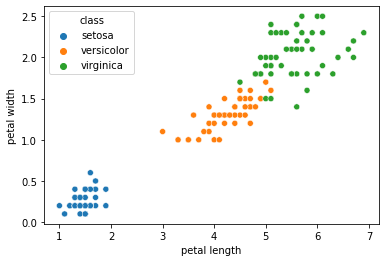

In [21]:
#Q9. What is relationship between petal length and petal width for different flower species ?

sns.scatterplot( data =df, x= 'petal length' , y='petal width' , hue ='class')

plt.show()

# virginica class flowers have longest petal length and petal width.
# setosa class flowers have smallest petal length and petal width from the given 3 classes in he dataset.


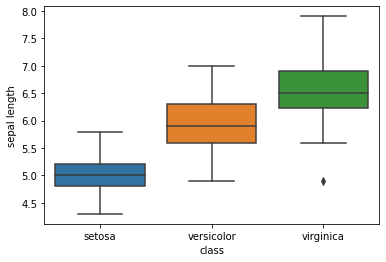

In [22]:
# Q10. Compare the sepal length of the 3 flower species.

sns.boxplot(data = df , y = 'sepal length' , x ='class')

plt.show()

# From the grouped boxplot graph, virginica class flower species has highest sepal length and setosa the lowest.

# Also, there is an outlier in virginica flower class.
